In [1]:
# take a look of the position

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
raw_data = pd.read_csv('./data/labapp3-positions.txt', sep=' ', names=['nodeid','x','y'])

In [3]:
position_data=raw_data.copy()
# use the first columnas index
position_data.set_index('nodeid', inplace=True)

In [4]:
position_data

,x,y
nodeid,,
1,21.5,23
2,24.5,20
3,19.5,19
4,22.5,15
5,24.5,12
6,19.5,12
7,22.5,8
8,24.5,4
9,21.5,2


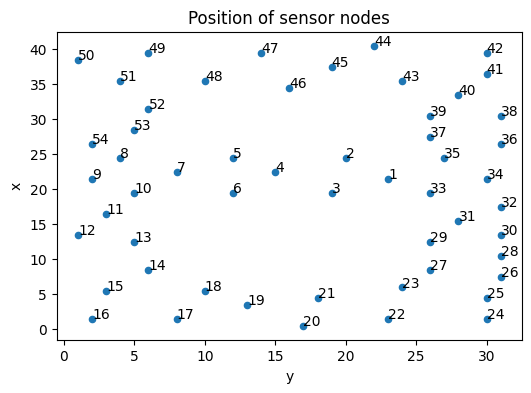

In [6]:
# scatter plot
plt.figure(figsize=(6,4))
plt.scatter(position_data['y'], position_data['x'], s=20)
plt.title('Position of sensor nodes')
plt.xlabel('y')
plt.ylabel('x')
# add labels
for i in position_data.index:
    plt.text(position_data.loc[i]['y'], position_data.loc[i]['x'], i)